In [2]:
import pandas as pd
from config import *
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
day_step = 5

# Plot the IL

In [28]:
file_path_list = []
data_path = "data/"
for (root, dirs, file) in os.walk(data_path):
    for f in file:
        if '.csv' in f:
            file_path_list.append(root+'/'+f)
len(file_path_list)

18

In [29]:
file_path = file_path_list[0]


In [30]:
prefix_title = ['Appendix A1', 'Appendix A2', 'A1', 'A2', 'B1', 'B2']
pool_title = [
    'PT-gDAI-28MAR24/SY-gDAI (Arbitrum)',
    'PT-GLP-28MAR24/SY-GLP (Arbitrum)',
    'PT-stETH-26DEC24/SY-stETH (Ethereum)'
]

In [31]:
for id in range(18):
    print(prefix_title[id%len(prefix_title)] + ':' + pool_title[id//len(prefix_title)])

Appendix A1:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
Appendix A2:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
A1:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
A2:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
B1:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
B2:PT-gDAI-28MAR24/SY-gDAI (Arbitrum)
Appendix A1:PT-GLP-28MAR24/SY-GLP (Arbitrum)
Appendix A2:PT-GLP-28MAR24/SY-GLP (Arbitrum)
A1:PT-GLP-28MAR24/SY-GLP (Arbitrum)
A2:PT-GLP-28MAR24/SY-GLP (Arbitrum)
B1:PT-GLP-28MAR24/SY-GLP (Arbitrum)
B2:PT-GLP-28MAR24/SY-GLP (Arbitrum)
Appendix A1:PT-stETH-26DEC24/SY-stETH (Ethereum)
Appendix A2:PT-stETH-26DEC24/SY-stETH (Ethereum)
A1:PT-stETH-26DEC24/SY-stETH (Ethereum)
A2:PT-stETH-26DEC24/SY-stETH (Ethereum)
B1:PT-stETH-26DEC24/SY-stETH (Ethereum)
B2:PT-stETH-26DEC24/SY-stETH (Ethereum)


In [5]:
def plot_2d(df, save_path, xlabel="Date", ylabel="", title=""):
    %matplotlib inline
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    p = sns.lineplot(ax=ax, data=df)
    p.set(xticks = range(0,len(df), 6), xlabel=xlabel, ylabel=ylabel, title=title)
    p.set_yticklabels([round(y, 5) for y in p.get_yticks()])
    plt.savefig(save_path, dpi=300)

In [ ]:
for id, file_path in enumerate(file_path_list):
    title = prefix_title[id%len(prefix_title)] + ':' + pool_title[id//len(prefix_title)] 
    df = pd.read_csv(file_path, index_col=False).transpose()
    df = df.drop(df.index[0])

    small_df = df[range(0,len(df), day_step)]
    date = pd.date_range("2023-04-24", freq=f"{DAY_DELTA*day_step}D", periods=len(small_df.columns))
    small_df.columns = date.strftime('%Y-%m-%d')

    # small_df.head()

    sns.set(rc={'figure.figsize':(1000, 800)})

    %matplotlib inline
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    p = sns.lineplot(ax=ax, data=small_df)
    p.set(xticks = range(0,len(df), 6), xlabel='Date', ylabel='IL', title=title)
    p.set_yticklabels([round(y, 5) for y in p.get_yticks()])
    save_path = file_path.replace("data", "plot")
    save_path = save_path.replace("csv", "jpg")
    plt.savefig(save_path, dpi=300)

[[<matplotlib.axis.XTick at 0x2076d78beb0>,
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'IL')]

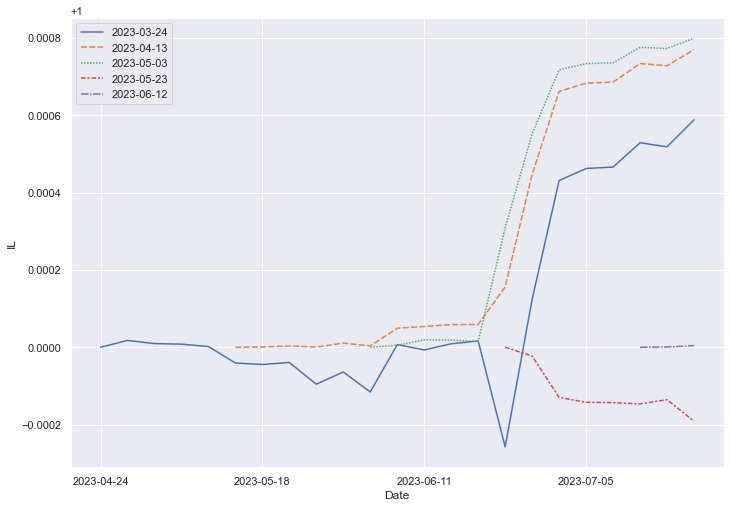

In [34]:
# For testing only
file_path = file_path_list[-2] 
df = pd.read_csv(file_path, index_col=False).transpose()
df = df.drop(df.index[0])

small_df = df[range(0,len(df), day_step)]
date = pd.date_range("2023-04-24", freq=f"{DAY_DELTA*day_step}D", periods=len(small_df.columns))
small_df.columns = date.strftime('%Y-%m-%d')

# small_df.head()

sns.set(rc={'figure.figsize':(1000, 800)})

%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)


p = sns.lineplot(ax=ax, data=small_df)
p.set(xticks = range(0,len(df), 6), xlabel='Date', ylabel='IL')

# save_path = file_path.replace("data", "plot")
# save_path = save_path.replace("csv", "jpg")
# plt.savefig(save_path, dpi=300)

# Plot the profit

In [19]:
df = pd.read_csv("data\LP_profit\stETH.csv", index_col=False).transpose()
df = df.drop(df.index[0])
small_df = df[range(0,len(df), day_step)]
date = pd.date_range("2023-04-24", freq=f"{DAY_DELTA*day_step}D", periods=len(small_df.columns))
small_df.columns = date.strftime('%Y-%m-%d')

C:\Users\vgtgd\AppData\Local\Temp\ipykernel_9416\1733182267.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels([round(y, 5) for y in p.get_yticks()])


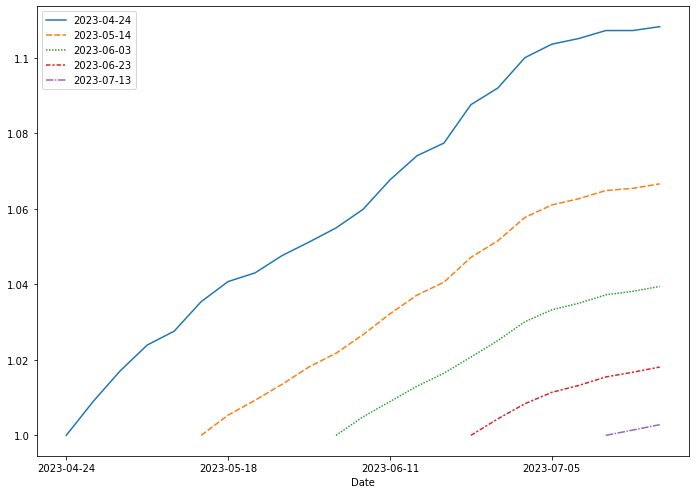

In [20]:
plot_2d(small_df, "data\LP_profit\stETH.jpg")